# Financial Analytics

## Problem Statement
Without analyzing the competition, it is difficult for a business to survive. You are tasked to analyse the competition for the management to provide better results. This data set has information on the market capitalization of the top 500 companies in India.

**Column Description:**

Serial Number

Name : Name of Company

Mar Cap – Crore : Market Capitalization in Crores

Sales Qtr – Crore : Quarterly Sale in crores.

Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.Load and Study the Data

In [ ]:
data= pd.read_csv('/content/Financial Analytics data.csv')

In [ ]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [ ]:
data.dtypes

,0
S.No.,int64
Name,object
Mar Cap - Crore,float64
Sales Qtr - Crore,float64
Unnamed: 4,float64


In [ ]:
data.shape

(488, 5)

In [ ]:
data.index

RangeIndex(start=0, stop=488, step=1)

In [ ]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [ ]:
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


**Observations:**
* There are 488 rows and 5 columns
* There are many NaN values in Mar Cap - Crore and Sales Qtr - Crore
* Sales Qtr - Crore and Unnamed:4 columns should be merged.





## 2.Data Cleaning

### 2.1 Renaming Columns

In [ ]:
rename={"Mar Cap - Crore":"Market_Capitalization","Sales Qtr - Crore":"Quarterly Sale"}
data=data.rename(columns=rename)
data.head()

,S.No.,Name,Market_Capitalization,Quarterly Sale,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


### 2.2 Change Table Index

In [ ]:
data = data.set_index('S.No.')
data.head()

,Name,Market_Capitalization,Quarterly Sale,Unnamed: 4
S.No.,,,,
1,Reliance Inds.,583436.72,99810.00,NaN
2,TCS,563709.84,30904.00,NaN
3,HDFC Bank,482953.59,20581.27,NaN
4,ITC,320985.27,9772.02,NaN
5,H D F C,289497.37,16840.51,NaN


### 2.3 Identifying NaN Values

In [ ]:
data.isnull().sum()# there are NaN values in Mar Cap - Crore,Sales Qtr - Crore, &	Unnamed: 4

,0
Name,0
Market_Capitalization,9
Quarterly Sale,123
Unnamed: 4,394


In [ ]:
data[3:4] = data[3:4].replace(np.nan,0)#Replace NaN vales with 0

In [ ]:
data.head()

,Name,Market_Capitalization,Quarterly Sale,Unnamed: 4
S.No.,,,,
1,Reliance Inds.,583436.72,99810.00,NaN
2,TCS,563709.84,30904.00,NaN
3,HDFC Bank,482953.59,20581.27,NaN
4,ITC,320985.27,9772.02,0.0
5,H D F C,289497.37,16840.51,NaN


In [ ]:
data.fillna(0, inplace=True)#fill empty cells with 0

In [ ]:
data.head()

,Name,Market_Capitalization,Quarterly Sale,Unnamed: 4
S.No.,,,,
1,Reliance Inds.,583436.72,99810.00,0.0
2,TCS,563709.84,30904.00,0.0
3,HDFC Bank,482953.59,20581.27,0.0
4,ITC,320985.27,9772.02,0.0
5,H D F C,289497.37,16840.51,0.0


### 2.4 Merge column and drop unwanted column

In [ ]:
#Merge columns
data['Quarterly Sale']=data['Quarterly Sale']+data['Unnamed: 4']

In [ ]:
data.head()

,Name,Market_Capitalization,Quarterly Sale,Unnamed: 4
S.No.,,,,
1,Reliance Inds.,583436.72,99810.00,0.0
2,TCS,563709.84,30904.00,0.0
3,HDFC Bank,482953.59,20581.27,0.0
4,ITC,320985.27,9772.02,0.0
5,H D F C,289497.37,16840.51,0.0


In [ ]:
data= data.drop(['Unnamed: 4'], axis=1)#drop Unnamed: 4 column

In [ ]:
data.head(5)

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
1,Reliance Inds.,583436.72,99810.00
2,TCS,563709.84,30904.00
3,HDFC Bank,482953.59,20581.27
4,ITC,320985.27,9772.02
5,H D F C,289497.37,16840.51


**Market_Capitalization**: Market Capitalization in crores – This represents the total market value of a company's outstanding shares, expressed in crores.

**Quarterly Sale**: Quarterly Sales in crores – This represents the sales revenue of the company for the most recent quarter, expressed in crores.

In [ ]:
data.isnull().sum()

,0
Name,0
Market_Capitalization,0
Quarterly Sale,0


In [ ]:
columns=list(data)
columns

['Name', 'Market_Capitalization', 'Quarterly Sale']

In [ ]:
(data[columns[1:3]]==0).sum()

,0
Market_Capitalization,9
Quarterly Sale,30


In [ ]:
data[columns[1:3]] = data[columns[1:3]].replace(0,np.nan)

In [ ]:
data.isnull().sum()#Found NaN values

,0
Name,0
Market_Capitalization,9
Quarterly Sale,30


**Observations:**
*    9 NaN values identified in Market_Capitalization	column and 30 in Quarterly Sale	column
*   Removed Unwanted columns



### 2.5 Dealing with NaN Values using Central Tendencies
Since the dataset is small, its not advised to drop the NaN values. We have to use imputation techniques to deal with NaN values

In [ ]:
data.shape

(488, 3)

In [ ]:
data.isnull().sum()

,0
Name,0
Market_Capitalization,9
Quarterly Sale,30


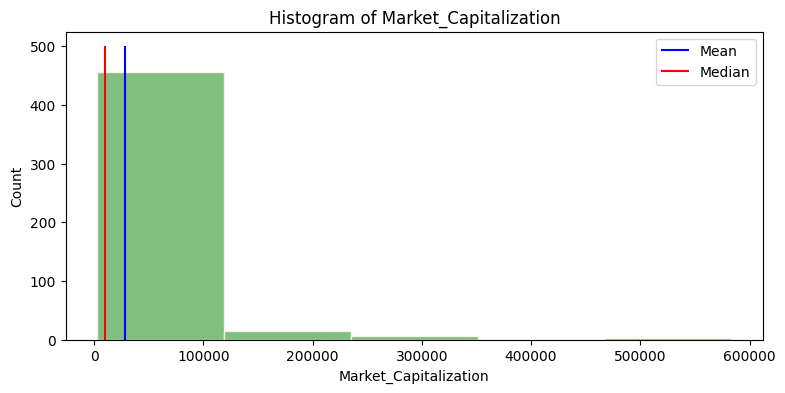

In [ ]:
plt.figure(figsize = (9,4))
sns.histplot(data = data ,x = 'Market_Capitalization', color = 'green',edgecolor = 'linen', alpha = 0.5, bins = 5)
plt.title("Histogram of Market_Capitalization")
plt.xlabel('Market_Capitalization')
plt.ylabel('Count')
plt.vlines(data['Market_Capitalization'].mean(), ymin = 0, ymax = 500, colors='blue', label='Mean')
plt.vlines(data['Market_Capitalization'].median(), ymin = 0, ymax = 500, colors='red', label='Median')
plt.legend()
plt.show()

In [ ]:
round(data['Market_Capitalization'].mean(),2)  #Mean Value of Market_Capitalization

28043.86

In [ ]:
data['Market_Capitalization'].median()#Median Value of Market_Capitalization

9885.05

From the above histogram plot, it is observed that the data is skewwed. Therefore we can check the distribution using distplot function.

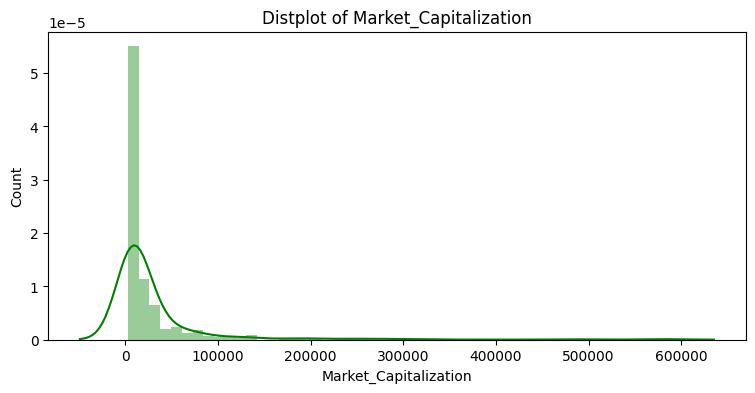

In [ ]:
plt.figure(figsize = (9,4))
sns.distplot(data['Market_Capitalization'], color = 'green')
plt.title("Distplot of Market_Capitalization")
plt.xlabel('Market_Capitalization')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the skewwness of data
data['Market_Capitalization'].skew()


5.560197674089212

Since the skewness value is greater than 1, Market_Capitalization data is positively skewed.

For skewed data we need to use the median technique to handle missing values

In [ ]:
  col=data['Market_Capitalization']
  col=col.fillna(col.median(),inplace=True)

In [ ]:
data.isnull().sum()

,0
Name,0
Market_Capitalization,0
Quarterly Sale,30


By using the Median technique the NaN values are cleared. The same can be applied to Quarterly Sale

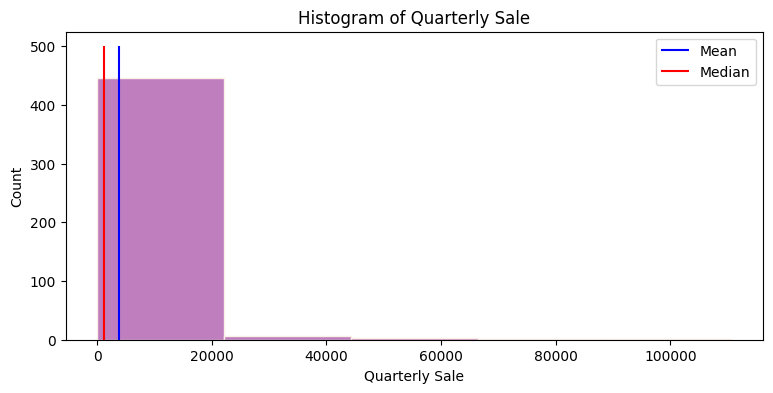

In [ ]:
plt.figure(figsize = (9,4))
sns.histplot(data = data ,x = 'Quarterly Sale', color = 'purple',edgecolor = 'linen', alpha = 0.5, bins = 5)
plt.title("Histogram of Quarterly Sale")
plt.xlabel('Quarterly Sale')
plt.ylabel('Count')
plt.vlines(data['Quarterly Sale'].mean(), ymin = 0, ymax = 500, colors='blue', label='Mean')
plt.vlines(data['Quarterly Sale'].median(), ymin = 0, ymax = 500, colors='red', label='Median')
plt.legend()
plt.show()

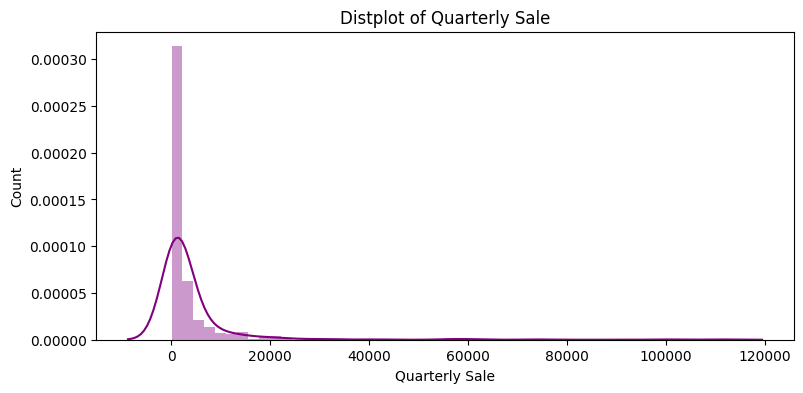

In [ ]:
plt.figure(figsize = (9,4))
sns.distplot(data['Quarterly Sale'], color = 'purple')
plt.title("Distplot of Quarterly Sale")
plt.xlabel('Quarterly Sale')
plt.ylabel('Count')
plt.show()

In [ ]:
data['Quarterly Sale'].skew()

6.827296145429928

Since the skewness value is greater than 1, Quarterly Sale data is positively skewed.

For skewed data we need to use the median technique to handle missing values

In [ ]:
col1=data['Quarterly Sale']
col1=col1.fillna(col1.median(),inplace=True)

In [ ]:
data.isnull().sum()

,0
Name,0
Market_Capitalization,0
Quarterly Sale,0


In [ ]:
data.shape

(488, 3)

All the NaN Values are cleaned using the median technique.

### 2.6 Duplicate Values

In [ ]:
data[data.duplicated()]

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,


There are no duplicate rows in our dataset

# EDA(Exploratory Data Analysis)

## 3.Outliers

In [ ]:
data.describe()

,Market_Capitalization,Quarterly Sale
count,488.000000,488.000000
mean,27708.961086,3651.624775
std,58963.329098,9707.258438
min,3017.070000,19.420000
25%,4879.612500,576.675000
50%,9885.050000,1140.585000
75%,23400.815000,2580.797500
max,583436.720000,110666.930000


In [ ]:
data.head()

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
1,Reliance Inds.,583436.72,99810.00
2,TCS,563709.84,30904.00
3,HDFC Bank,482953.59,20581.27
4,ITC,320985.27,9772.02
5,H D F C,289497.37,16840.51


### Identifying the Outliers

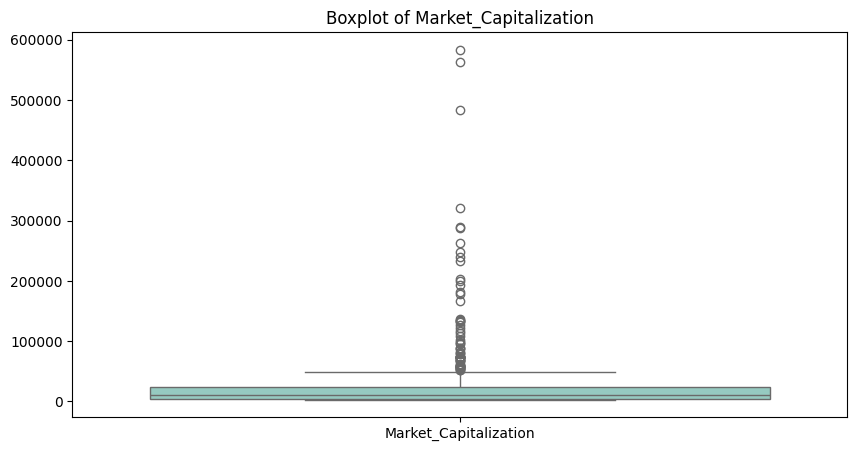

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data[['Market_Capitalization']], palette="Set3")
plt.title("Boxplot of Market_Capitalization")
plt.show()

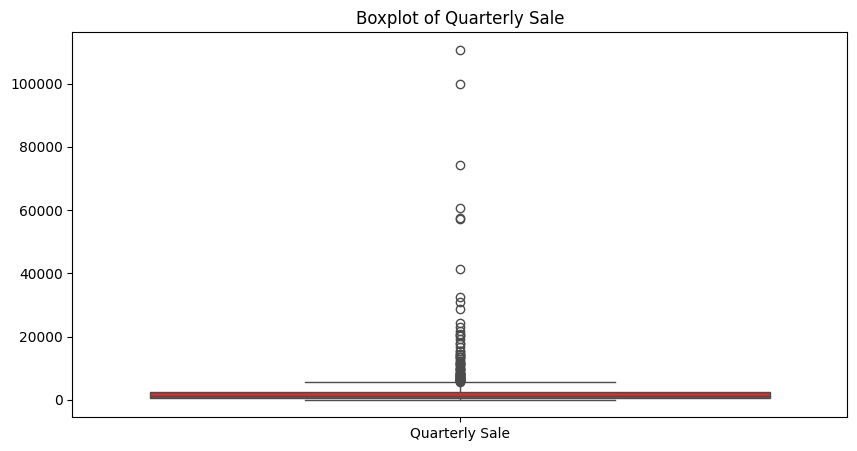

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data[['Quarterly Sale']], palette="Set1")
plt.title("Boxplot of Quarterly Sale")
plt.show()

From the above BoxPlot , it is observed that there are outliers in the Market_Capitalization and Quarterly Sale columns.

### Outliers Removal - IQR Technique - New Dataframe

In [ ]:
data.shape

(488, 3)

In [ ]:
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [ ]:
outliers_market_cap = find_outliers(data["Market_Capitalization"])
outliers_sales_qtr = find_outliers(data["Quarterly Sale"])
data_no_outliers = data[~data["Market_Capitalization"].isin(outliers_market_cap)]
data_no_outliers = data_no_outliers[~data_no_outliers["Quarterly Sale"].isin(outliers_sales_qtr)]


In [ ]:
data.shape

(488, 3)

In [ ]:
data_no_outliers.shape

(401, 3)

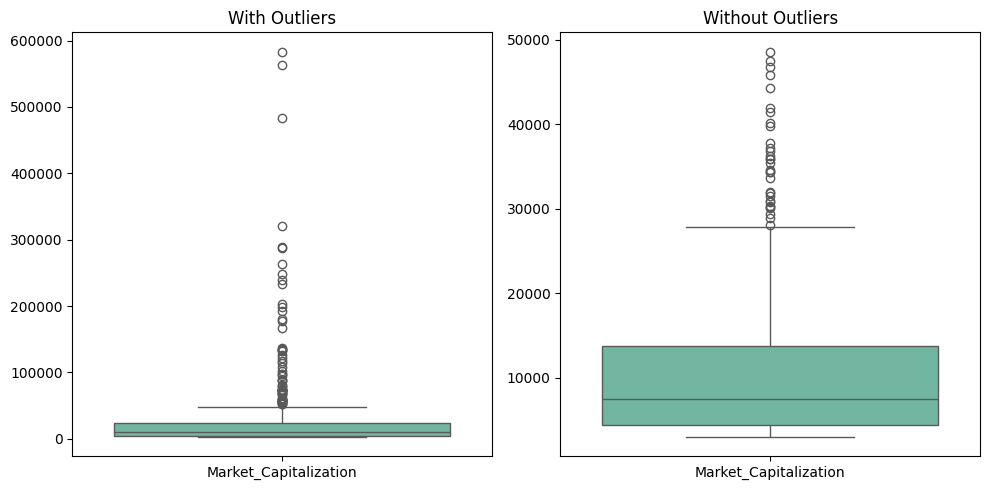

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(data[['Market_Capitalization']], palette="Set2")
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data_no_outliers[['Market_Capitalization']], palette="Set2")
plt.title("Without Outliers")
plt.tight_layout()
plt.show()

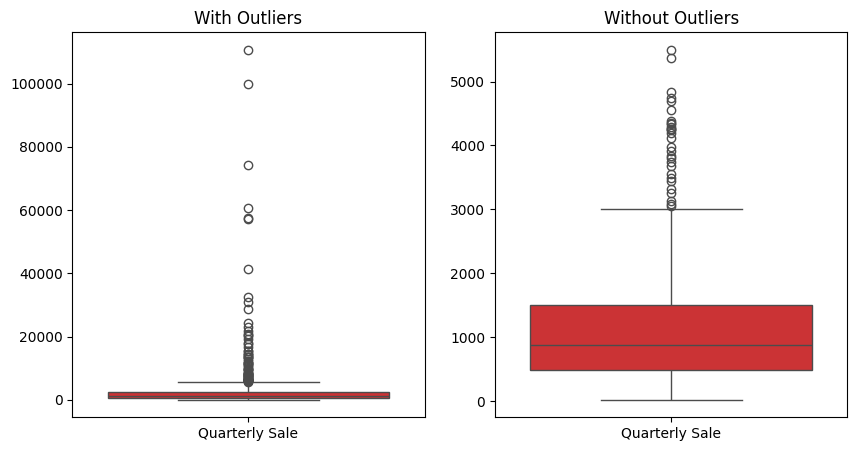

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(data[['Quarterly Sale']], palette="Set1")
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data_no_outliers[['Quarterly Sale']], palette="Set1")
plt.title("Without Outliers")
plt.show()

The Outliers are removed from the dataset using IQR Method and created a new dataframe without the outliers.

While removing the outliers, there will be a huge data loss.

Removal of outliers will give a better quality data, but still we are not sure whether these are outliers or some extreme conditions.

More Analysis is required regarding the outliers

### Percentage of Data Removal - Outliers

In [ ]:
# Calculate the percentage of data removed
percentage_removed = ((data.shape[0] - data_no_outliers.shape[0]) / data.shape[0]) * 100
print(f"Percentage of data removed: {percentage_removed:.2f}%")

Percentage of data removed: 17.83%


As per the comparion, almost 17% of data got removed after the removal of outliers.
Removal of more than 5% of data is not good.

Since it a financial data and the dataset is very small, removal of extreme values will affect the analysis.

So, instead of removal of ouliers, to reduce the impact of extreme values, will apply log transformation to our original data.

### Log Transformation of Data

In [ ]:
data_log_transformed = data.copy()
data_log_transformed['Market_Capitalization'] = np.log(data_log_transformed['Market_Capitalization'])
data_log_transformed['Quarterly Sale'] = np.log(data_log_transformed['Quarterly Sale'])
data_log_transformed.head()

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
1,Reliance Inds.,13.276691,11.511024
2,TCS,13.242295,10.338641
3,HDFC Bank,13.087676,9.932137
4,ITC,12.679151,9.187278
5,H D F C,12.575901,9.731543


## 4.Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = data_log_transformed
# data1 is the cleaned and log transformed dataframe which should be used further for analysis

In [ ]:
data.head()

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
1,Reliance Inds.,583436.72,99810.00
2,TCS,563709.84,30904.00
3,HDFC Bank,482953.59,20581.27
4,ITC,320985.27,9772.02
5,H D F C,289497.37,16840.51


In [ ]:
data1.head()

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
1,Reliance Inds.,13.276691,11.511024
2,TCS,13.242295,10.338641
3,HDFC Bank,13.087676,9.932137
4,ITC,12.679151,9.187278
5,H D F C,12.575901,9.731543


### Top 5 Companies by Market Capitalization

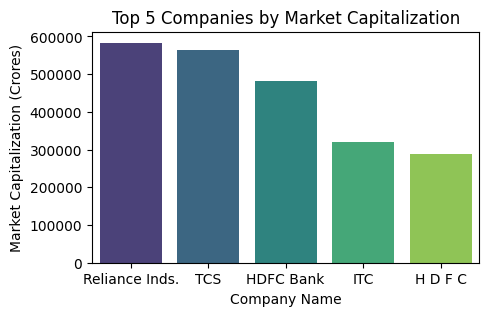

In [ ]:
top_5_Market_Capitalization = data.sort_values('Market_Capitalization', ascending=False).head(5)
plt.figure(figsize=(5, 3))
sns.barplot(x='Name', y='Market_Capitalization', data=top_5_Market_Capitalization, palette='viridis')
plt.title('Top 5 Companies by Market Capitalization')
plt.xlabel('Company Name')
plt.ylabel('Market Capitalization (Crores)')
plt.show()

**Observation:**

The Top 5 Companies having high Market Capitalization are :

**Reliance Inds, TCS, HDFC Bank, ITC  and HDFC**

### Top 5 Companies by Quarterly Sale

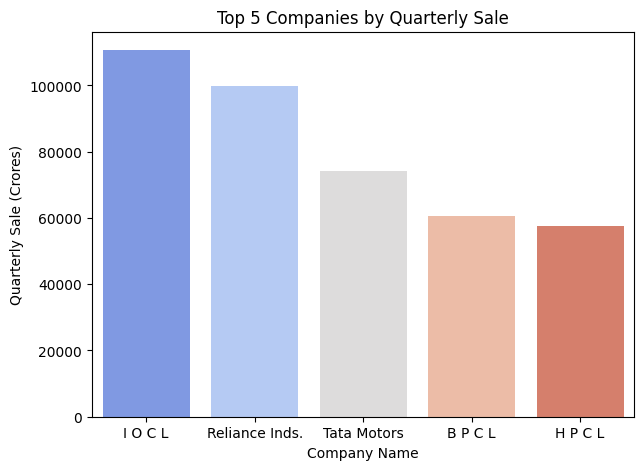

In [ ]:
top_5_Quarterly_Sale = data.sort_values('Quarterly Sale', ascending=False).head(5)
plt.figure(figsize=(7, 5))
sns.barplot(x='Name', y='Quarterly Sale', data=top_5_Quarterly_Sale, palette='coolwarm')
plt.title('Top 5 Companies by Quarterly Sale')
plt.xlabel('Company Name')
plt.ylabel('Quarterly Sale (Crores)')
plt.show()

**Observation:**

The Top 5 Companies having high Quarterly Sales are :

**IOCL,Reliance Inds, Tata Motors, BPCL  and HPCL**

### Companies with highest Market Capitalization & Quarterly Sales

In [ ]:
data['Market_Capitalization'].mean()

27708.961086065574

In [ ]:
data.sort_values('Market_Capitalization', ascending=False).head(10)

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
1,Reliance Inds.,583436.72,99810.00
2,TCS,563709.84,30904.00
3,HDFC Bank,482953.59,20581.27
4,ITC,320985.27,9772.02
5,H D F C,289497.37,16840.51
6,Hind. Unilever,288265.26,8590.00
7,Maruti Suzuki,263493.81,19283.20
8,Infosys,248320.35,17794.00
9,O N G C,239981.50,22995.88


In [ ]:
data.sort_values('Quarterly Sale', ascending=False).head(10)

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
15,I O C L,178017.48,110666.93
1,Reliance Inds.,583436.72,99810.00
24,Tata Motors,117071.87,74156.07
28,B P C L,98278.00,60616.36
55,H P C L,58034.78,57474.25
10,St Bk of India,232763.33,57014.08
123,Rajesh Exports,23495.54,41304.84
41,Tata Steel,73376.14,32464.14
2,TCS,563709.84,30904.00


In [ ]:
Top_MC_QS=(data['Market_Capitalization']>100000) & (data['Quarterly Sale']>30000)

In [ ]:
Top_df=data[Top_MC_QS]
Top_df

,Name,Market_Capitalization,Quarterly Sale
S.No.,,,
1,Reliance Inds.,583436.72,99810.00
2,TCS,563709.84,30904.00
10,St Bk of India,232763.33,57014.08
15,I O C L,178017.48,110666.93
24,Tata Motors,117071.87,74156.07


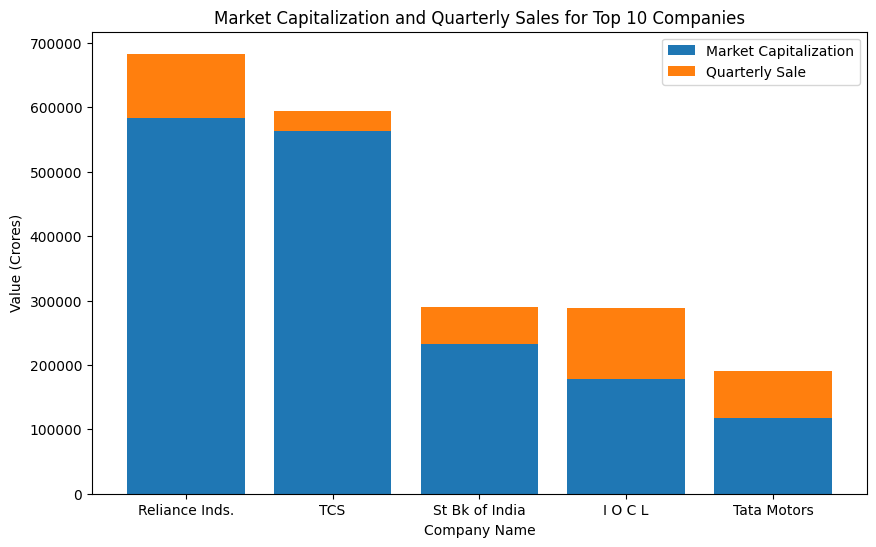

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Top_df['Name'], Top_df['Market_Capitalization'], label='Market Capitalization')
plt.bar(Top_df['Name'], Top_df['Quarterly Sale'], bottom=Top_df['Market_Capitalization'], label='Quarterly Sale')
plt.xlabel('Company Name')
plt.ylabel('Value (Crores)')
plt.title('Market Capitalization and Quarterly Sales for Top 10 Companies')
plt.legend()
plt.show()

**Observation:**
* Reliance Inds. has maximum Market Capitalization and Quarterly Sales.
* TCS has high Market Capitalization but the Quarterly Sale is low compared to other top companies.


### Relationship between Market Capitalization and Quarterly Sales

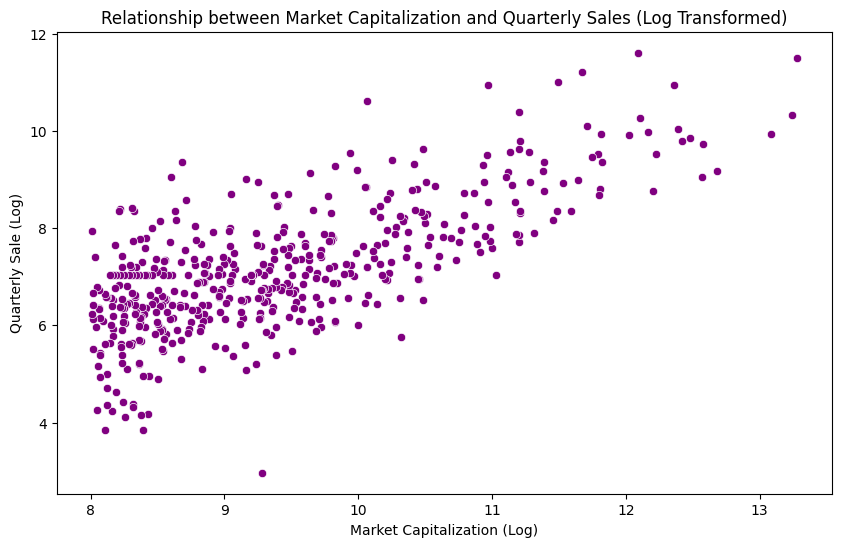

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Market_Capitalization', y='Quarterly Sale',data=data1,ax=ax,color='purple')
plt.title('Relationship between Market Capitalization and Quarterly Sales (Log Transformed)')
plt.xlabel('Market Capitalization (Log)')
plt.ylabel('Quarterly Sale (Log)')
plt.show()


Market capitalization and quarterly sales is having a positive correlation with each other, so the companies having higher market capitalization tends to have higher quarterly sales.
To get more visibility to the relationship, we use the log data.

In [ ]:
data.to_excel("cleaned_data.xlsx", index=False)

In [ ]:
from google.colab import files
files.download("cleaned_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>